# Markov Chains

In [1]:
state_wheather = ("sunny", "cloudy", "rainy")

import numpy as np
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import pandas as pd
import time
import math
import random

Задание 1. Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную states.

In [2]:
index=[]

x=random.randrange(3)
if (x-1)<0:
    index.append(0)
else:
    if (x-2)<0:
        index.append(1)
    else :
        index.append(2)
            

for i in range (20000):
    x=random.choices([0, 1, 2], weights=[transition_matrix[index[i-1]][0],transition_matrix[index[i-1]][1],transition_matrix[index[i-1]][2]])
    index.append(x[0])
    
states=[state_wheather[index[i]] for i in range(0,20000)]    

print(states[100:150])

['cloudy', 'sunny', 'sunny', 'sunny', 'sunny', 'cloudy', 'sunny', 'rainy', 'sunny', 'rainy', 'sunny', 'cloudy', 'sunny', 'cloudy', 'sunny', 'sunny', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'sunny', 'rainy', 'sunny', 'rainy', 'sunny', 'rainy', 'sunny', 'sunny', 'rainy', 'sunny', 'rainy', 'sunny', 'cloudy', 'rainy', 'rainy', 'sunny', 'cloudy', 'sunny', 'cloudy', 'sunny', 'rainy', 'sunny', 'rainy', 'sunny', 'rainy', 'cloudy', 'sunny', 'cloudy', 'sunny']


Задание 2. На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды.

In [3]:
def frequency(k,n,s):
    m=0
    for i in range(n):
        if s[i]==k:
            m+=1
    return m/n

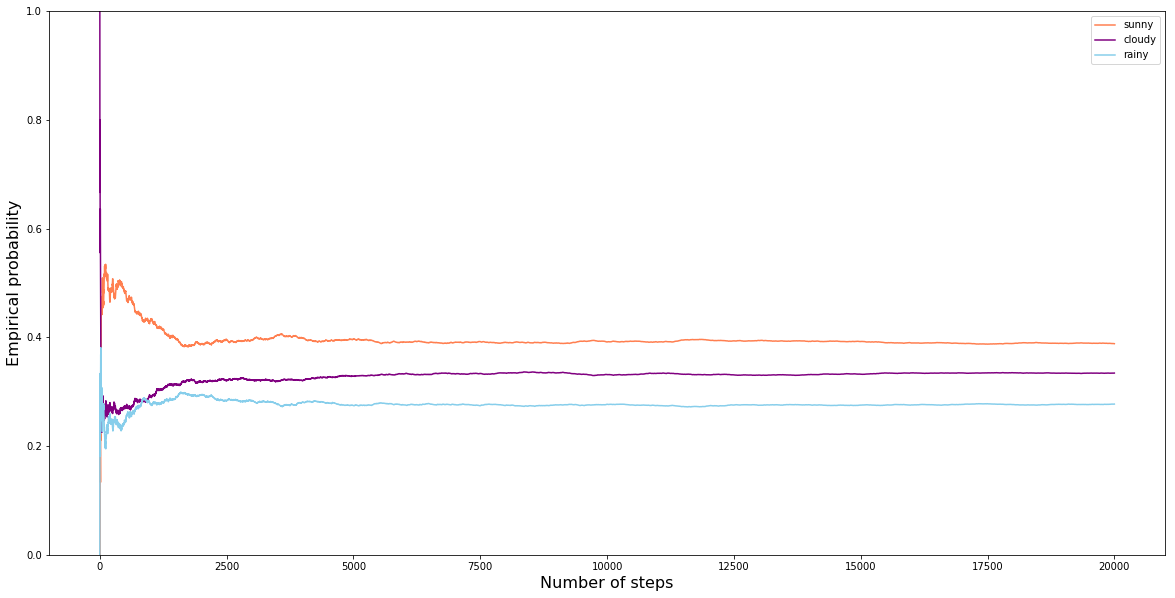

In [4]:
s=[frequency(0,i,index) for i in range(1,20000)]
c=[frequency(1,i,index) for i in range(1,20000)]
r=[frequency(2,i,index) for i in range(1,20000)]
x=[i for i in range(1,20000)]

plt.figure(figsize=(20,10))

plt.plot(x, s , label='sunny', c='coral')
plt.plot(x, c, label='cloudy', c='purple')
plt.plot(x, r, label='rainy', c='skyblue')
plt.ylim([0, 1])
plt.xlabel('Number of steps', fontsize=16)
plt.ylabel('Empirical probability',  fontsize=16)
plt.legend()

plt.show()



Задание 3. Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

    Посчитаем собственные числа и собственные векторы, найдем вектор, соответствующий собственному числу 1 (первый столбец).

In [11]:
np.linalg.eig(transition_matrix.transpose())

(array([1. , 0.4, 0.1]),
 array([[-6.67423812e-01, -7.07106781e-01,  2.67261242e-01],
        [-5.72077554e-01, -2.88771995e-16, -8.01783726e-01],
        [-4.76731295e-01,  7.07106781e-01,  5.34522484e-01]]))

    Вектор частот:

In [7]:
v=[s[19998],c[19998],r[19998]]
print(v)

[0.38841942097104853, 0.3343167158357918, 0.27726386319315965]


    Получим, что v1_1/v_1=v1_2/v_2=v1_3/v_3=-1.736. Значит, вектор π - искомая стационарная плотность.

In [8]:
np.linalg.matrix_power(transition_matrix, 10)

array([[0.38894132, 0.33333333, 0.27772535],
       [0.38887141, 0.33333333, 0.27779525],
       [0.38883646, 0.33333333, 0.27783021]])

    В строках записан вектор частот.

# MCMC (Markov Chain Monte Carlo)

Задание 4. Примените алгоритм Metropolis для генерации выборки из смеси двух гауссиан. Плотность смеси задается в виде p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

In [2]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

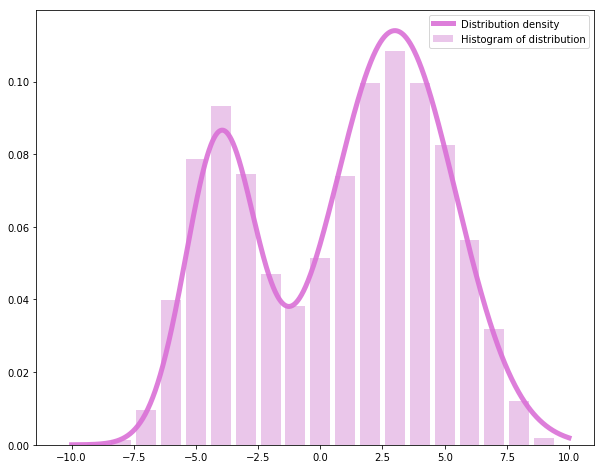

In [32]:
value = lambda x: 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

proposal = lambda x: (x + np.random.choice([-1, 1]))

post = metroplis(0, value, proposal, 10000)
    
plt.figure(figsize=(10,8))
plt.hist(post, bins=np.arange(-10, 10 + 1) - 0.5, rwidth=0.8, density=True, color = 'plum', alpha = 0.6, label = 'Histogram of distribution')
plt.legend(loc='upper right')

x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
plt.plot(x, y, alpha=0.9, lw=5, label='Distribution density', color='orchid')
plt.legend(loc='upper right')

plt.show()